# Homework 3 - Chapter 4

This is the initail copy of code from Chapter 4

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [2]:
max([max(sequence) for sequence in train_data])

9999

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[2]])

In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

# x corresponds to the data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train.shape)

(25000, 10000)


In [5]:
# y corresponds to the labells
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")
print(y_train.shape)

(25000,)


## 1) Change the model to use one hidden (aka "representation") layer, and see how this affects validation and test accuracy.  Show this by plotting them (on the same plot, like in the book).  Repeat this for three hidden layers.  Comment on any differences you find, as well as what you'd expect.


**Part 1 - One Layer Model**

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict_onelayer = history.history
history_dict_onelayer.keys()

Epoch 1/20
30/30 [==============================] - 6s 153ms/step - loss: 0.5228 - accuracy: 0.7941 - val_loss: 0.4145 - val_accuracy: 0.8629
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3386 - accuracy: 0.8995 - val_loss: 0.3321 - val_accuracy: 0.8803
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2608 - accuracy: 0.9191 - val_loss: 0.2967 - val_accuracy: 0.8883
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2150 - accuracy: 0.9321 - val_loss: 0.2834 - val_accuracy: 0.8881
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1811 - accuracy: 0.9434 - val_loss: 0.2755 - val_accuracy: 0.8901
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1566 - accuracy: 0.9530 - val_loss: 0.2781 - val_accuracy: 0.8877
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1370 - accuracy: 0.9596 - val_loss: 0.2851 - val_accuracy: 0.8840
Epoch 8/20
3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<br>

#### Results of Model with One Layer

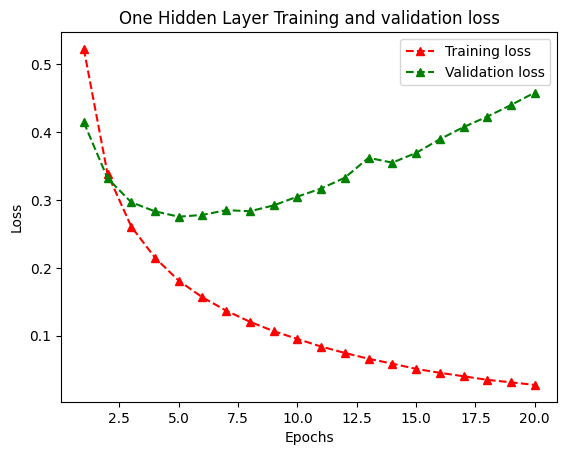

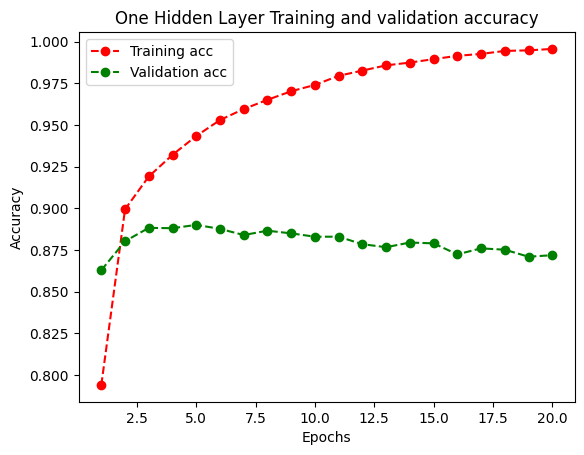

In [7]:
import matplotlib.pyplot as plt

# Training Loss vs Validatin Loss 
loss_values = history_dict_onelayer["loss"]
val_loss_values = history_dict_onelayer["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, label="Training loss", color = 'red', linestyle='--', marker = '^')
plt.plot(epochs, val_loss_values, label="Validation loss", color = 'green', linestyle='--', marker = '^')
plt.title("One Hidden Layer Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()

# Training Accuracy vs. Validation Accuracy
acc = history_dict_onelayer["accuracy"]
val_acc = history_dict_onelayer["val_accuracy"]
plt.plot(epochs, acc, label="Training acc", color='red', linestyle='--', marker='o')
plt.plot(epochs, val_acc, label="Validation acc", color='green', linestyle='--', marker='o')
plt.title("One Hidden Layer Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Part 2 - 3 Layer Model**

In [8]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict_threelayers = history.history
history_dict_threelayers.keys()

Epoch 1/20
30/30 [==============================] - 4s 58ms/step - loss: 0.5367 - accuracy: 0.7705 - val_loss: 0.3985 - val_accuracy: 0.8614
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3120 - accuracy: 0.9000 - val_loss: 0.3268 - val_accuracy: 0.8700
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2210 - accuracy: 0.9277 - val_loss: 0.2784 - val_accuracy: 0.8898
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1713 - accuracy: 0.9431 - val_loss: 0.2884 - val_accuracy: 0.8852
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1357 - accuracy: 0.9568 - val_loss: 0.3007 - val_accuracy: 0.8848
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1105 - accuracy: 0.9657 - val_loss: 0.3252 - val_accuracy: 0.8768
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0928 - accuracy: 0.9703 - val_loss: 0.4247 - val_accuracy: 0.8636
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

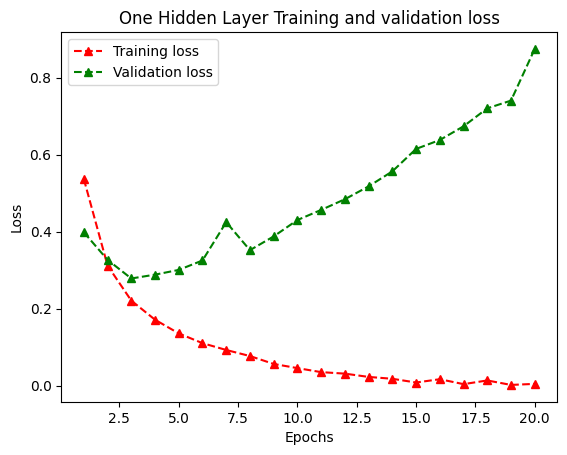

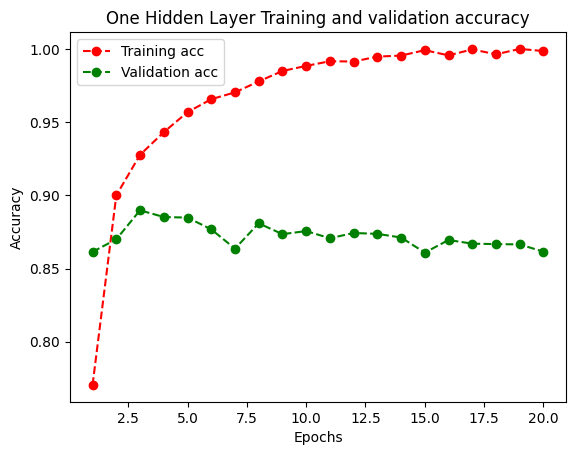

In [9]:
import matplotlib.pyplot as plt

# Training Loss vs Validatin Loss 
loss_values = history_dict_threelayers["loss"]
val_loss_values = history_dict_threelayers["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, label="Training loss", color = 'red', linestyle='--', marker = '^')
plt.plot(epochs, val_loss_values, label="Validation loss", color = 'green', linestyle='--', marker = '^')
plt.title("One Hidden Layer Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()

# Training Accuracy vs. Validation Accuracy
acc = history_dict_threelayers["accuracy"]
val_acc = history_dict_threelayers["val_accuracy"]
plt.plot(epochs, acc, label="Training acc", color='red', linestyle='--', marker='o')
plt.plot(epochs, val_acc, label="Validation acc", color='green', linestyle='--', marker='o')
plt.title("One Hidden Layer Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**One Layer vs 3 Layer**


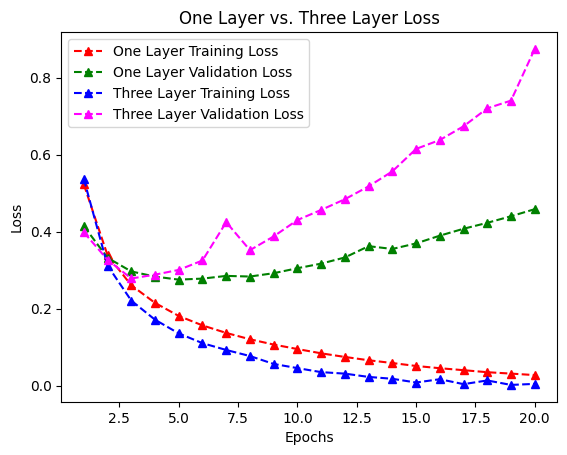

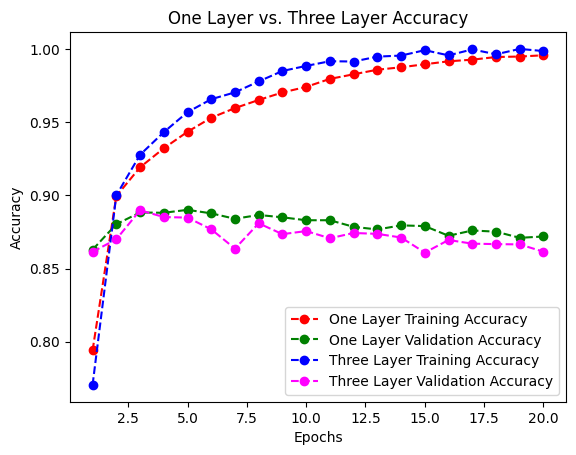

<Figure size 640x480 with 0 Axes>

In [10]:
loss_values = [
    history_dict_onelayer['loss'],
    history_dict_onelayer['val_loss'],
    history_dict_threelayers['loss'],
    history_dict_threelayers['val_loss']
]

acc_values = [
    history_dict_onelayer['accuracy'],
    history_dict_onelayer['val_accuracy'],
    history_dict_threelayers['accuracy'],
    history_dict_threelayers['val_accuracy']
]

loss_labels = ['One Layer ', 'Three Layer ', 'Training Loss', 'Validation Loss']
accuracy_labels = ['One Layer ', 'Three Layer ', 'Training Accuracy', 'Validation Accuracy']
colors = ['red', 'green', 'blue', 'magenta']

for idx, x in enumerate(loss_values):
    plt.plot(epochs, x, label=loss_labels[int(idx/2)] + loss_labels[idx%2 + 2], 
             color=colors[idx], linestyle='--', marker = '^')
    
plt.title("One Layer vs. Three Layer Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()

for idx, x in enumerate(acc_values):
    plt.plot(epochs, x, label=accuracy_labels[int(idx/2)] + accuracy_labels[idx%2 + 2], 
             color=colors[idx], linestyle='--', marker = 'o')
    
plt.title("One Layer vs. Three Layer Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.clf()

The best validation accuracy achieved was 88.98



by the 3 layer model. The best validation accuracy by the one layer model was 88.99

On comparing the loss and accuracies of the one layer and three layer side by side, we can see that the validation accuracy changes for the worse after the 4th epoch. Conversely, the accuracy and loss corresponding to the training set steadily increases past the 4th epoch - this implies that the model is overfitting itself to the training data - and from this we can infer that the best model is achieved soon after the 4th epoch of training.

<br>

Another key feature to note is that both models have relatively similar loss and accuracy on the Validation Set uptill the 4th epoch, but the Three Layer model exhibits a higher training accuracy and lower loss than the one layer model; thereby telling us that the Three Layer Model performs slightly better.

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

## 2) Try changing the number of nodes in the hidden layers to 100.  See how this affects validation and test accuracy.  Show this by plotting them (on the same plot, like in the book).**

#### Part 1 - 1 Layer, 100 Nodes

In [11]:
# Model Generation
model = keras.Sequential([
    layers.Dense(100, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict_onelayer = history.history
history_dict_onelayer.keys()

Epoch 1/20
30/30 [==============================] - 4s 100ms/step - loss: 0.4662 - accuracy: 0.7889 - val_loss: 0.3418 - val_accuracy: 0.8647
Epoch 2/20
30/30 [==============================] - 2s 78ms/step - loss: 0.2543 - accuracy: 0.9090 - val_loss: 0.2804 - val_accuracy: 0.8902
Epoch 3/20
30/30 [==============================] - 2s 59ms/step - loss: 0.1864 - accuracy: 0.9353 - val_loss: 0.2940 - val_accuracy: 0.8821
Epoch 4/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1518 - accuracy: 0.9482 - val_loss: 0.3046 - val_accuracy: 0.8801
Epoch 5/20
30/30 [==============================] - 2s 55ms/step - loss: 0.1234 - accuracy: 0.9590 - val_loss: 0.2998 - val_accuracy: 0.8843
Epoch 6/20
30/30 [==============================] - 2s 54ms/step - loss: 0.0995 - accuracy: 0.9683 - val_loss: 0.3891 - val_accuracy: 0.8630
Epoch 7/20
30/30 [==============================] - 2s 54ms/step - loss: 0.0797 - accuracy: 0.9785 - val_loss: 0.3419 - val_accuracy: 0.8800
Epoch 8/20
3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

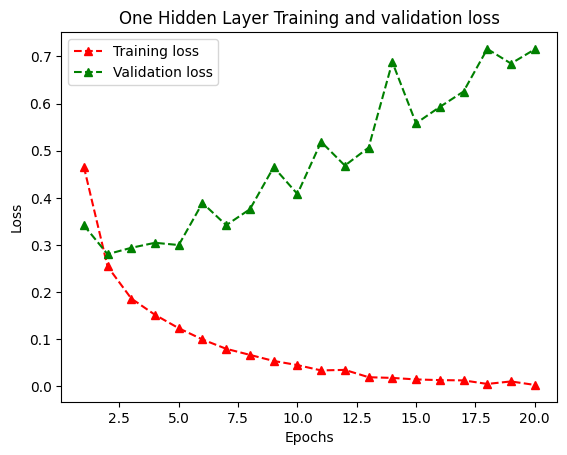

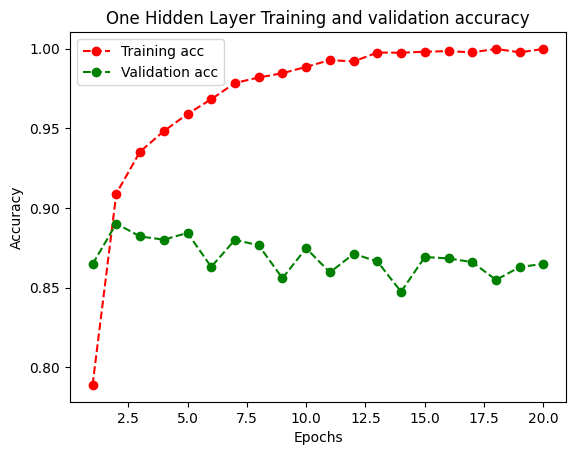

In [12]:
# Training Loss vs Validatin Loss 
loss_values = history_dict_onelayer["loss"]
val_loss_values = history_dict_onelayer["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, label="Training loss", color = 'red', linestyle='--', marker = '^')
plt.plot(epochs, val_loss_values, label="Validation loss", color = 'green', linestyle='--', marker = '^')
plt.title("One Hidden Layer Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()

# Training Accuracy vs. Validation Accuracy
acc = history_dict_onelayer["accuracy"]
val_acc = history_dict_onelayer["val_accuracy"]
plt.plot(epochs, acc, label="Training acc", color='red', linestyle='--', marker='o')
plt.plot(epochs, val_acc, label="Validation acc", color='green', linestyle='--', marker='o')
plt.title("One Hidden Layer Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Part 2 - Three Layers, 100 Nodes each

In [13]:
model = keras.Sequential([
    layers.Dense(100, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict_threelayers = history.history
history_dict_threelayers.keys()

Epoch 1/20
30/30 [==============================] - 4s 94ms/step - loss: 0.5087 - accuracy: 0.7556 - val_loss: 0.3272 - val_accuracy: 0.8741
Epoch 2/20
30/30 [==============================] - 2s 78ms/step - loss: 0.2609 - accuracy: 0.8992 - val_loss: 0.3495 - val_accuracy: 0.8590
Epoch 3/20
30/30 [==============================] - 2s 60ms/step - loss: 0.1746 - accuracy: 0.9323 - val_loss: 0.2879 - val_accuracy: 0.8842
Epoch 4/20
30/30 [==============================] - 2s 51ms/step - loss: 0.1232 - accuracy: 0.9565 - val_loss: 0.3320 - val_accuracy: 0.8834
Epoch 5/20
30/30 [==============================] - 2s 54ms/step - loss: 0.0872 - accuracy: 0.9706 - val_loss: 0.4254 - val_accuracy: 0.8792
Epoch 6/20
30/30 [==============================] - 2s 54ms/step - loss: 0.0964 - accuracy: 0.9760 - val_loss: 0.4099 - val_accuracy: 0.8834
Epoch 7/20
30/30 [==============================] - 2s 51ms/step - loss: 0.0115 - accuracy: 0.9976 - val_loss: 0.5513 - val_accuracy: 0.8809
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

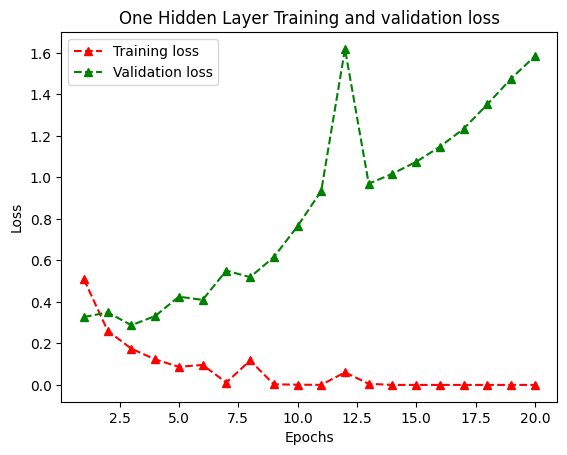

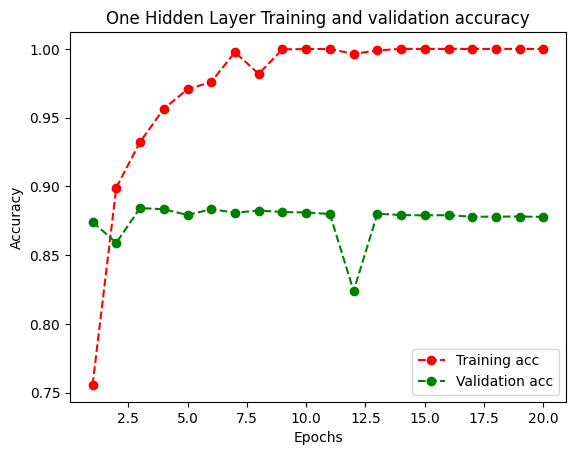

In [14]:
# Training Loss vs Validatin Loss 
loss_values = history_dict_threelayers["loss"]
val_loss_values = history_dict_threelayers["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, label="Training loss", color = 'red', linestyle='--', marker = '^')
plt.plot(epochs, val_loss_values, label="Validation loss", color = 'green', linestyle='--', marker = '^')
plt.title("One Hidden Layer Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()

# Training Accuracy vs. Validation Accuracy
acc = history_dict_threelayers["accuracy"]
val_acc = history_dict_threelayers["val_accuracy"]
plt.plot(epochs, acc, label="Training acc", color='red', linestyle='--', marker='o')
plt.plot(epochs, val_acc, label="Validation acc", color='green', linestyle='--', marker='o')
plt.title("One Hidden Layer Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<br>

**Results from Part 1 and Part 2 Plotted Against each other**

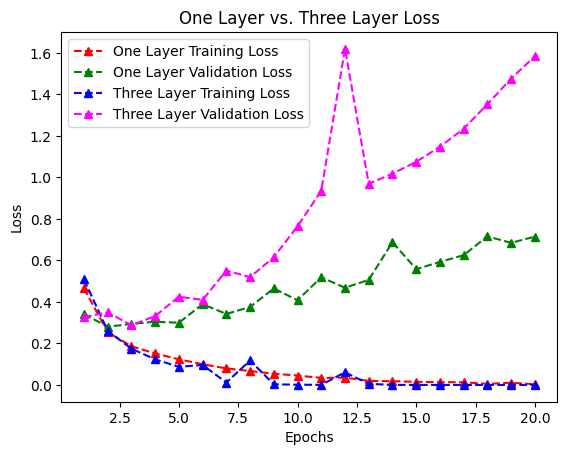

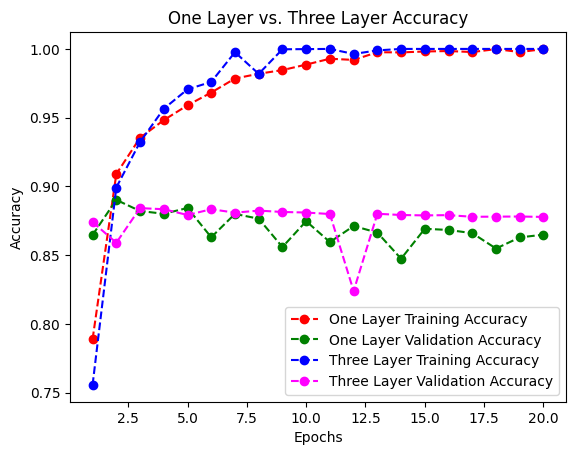

<Figure size 640x480 with 0 Axes>

In [15]:
loss_values = [
    history_dict_onelayer['loss'],
    history_dict_onelayer['val_loss'],
    history_dict_threelayers['loss'],
    history_dict_threelayers['val_loss']
]

acc_values = [
    history_dict_onelayer['accuracy'],
    history_dict_onelayer['val_accuracy'],
    history_dict_threelayers['accuracy'],
    history_dict_threelayers['val_accuracy']
]

loss_labels = ['One Layer ', 'Three Layer ', 'Training Loss', 'Validation Loss']
accuracy_labels = ['One Layer ', 'Three Layer ', 'Training Accuracy', 'Validation Accuracy']
colors = ['red', 'green', 'blue', 'magenta']

for idx, x in enumerate(loss_values):
    plt.plot(epochs, x, label=loss_labels[int(idx/2)] + loss_labels[idx%2 + 2], 
             color=colors[idx], linestyle='--', marker = '^')
    
plt.title("One Layer vs. Three Layer Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()

for idx, x in enumerate(acc_values):
    plt.plot(epochs, x, label=accuracy_labels[int(idx/2)] + accuracy_labels[idx%2 + 2], 
             color=colors[idx], linestyle='--', marker = 'o')
    
plt.title("One Layer vs. Three Layer Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.clf()

One of the biggest differences between the 100 node and the 16 node architecture is 100 node architecture plateuas at a much higher validation accuracy while maintaining a similar high training accurracy and corresponding low losses.

Other than that, the differences between both the Three Layer Model and the One Layer model both running the 100 node architecture, the Three Layer Model plateaus at a much higher validation accuracy and correspodingly lower loss.

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

## 3) Evaluate the test accuracy of the model before any training has taken place.  Compare this to the accuracy post-training, and comment on whether or not this is what you'd expect.

#### Question attempted with 3 layer model with 100 node architecture as from previous tests, this gave the best results. 

#### Pretraining results

In [16]:
pretraining_model = keras.Sequential([
    layers.Dense(100, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
pretraining_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
pretraining_model.evaluate(x_test, y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.6938 - accuracy: 0.4966


[0.6938191652297974, 0.4966000020503998]

In [17]:
posttraining_model = keras.Sequential([
    layers.Dense(100, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
posttraining_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
posttraining_model.fit(x_train, y_train, epochs = 4, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/4
49/49 [==============================] - 14s 261ms/step - loss: 0.4371 - accuracy: 0.8038 - val_loss: 0.3197 - val_accuracy: 0.8698
Epoch 2/4
49/49 [==============================] - 3s 64ms/step - loss: 0.2379 - accuracy: 0.9075 - val_loss: 0.2920 - val_accuracy: 0.8815
Epoch 3/4
49/49 [==============================] - 3s 67ms/step - loss: 0.1694 - accuracy: 0.9350 - val_loss: 0.5071 - val_accuracy: 0.8044
Epoch 4/4
49/49 [==============================] - 3s 65ms/step - loss: 0.1207 - accuracy: 0.9535 - val_loss: 0.3135 - val_accuracy: 0.8796


The results kind of represent what I expected. The untrained model achieved a accuracy of 50% which is higher than expected but hopefully the histogram of ouputs provides more insight into this. The trained model achieved a much higher accuracy with an accuracy of 87.5% after 4 epochs of training. 


<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

## 4) Generate a histogram of the output probabilities.  Explain what this represents. (use 10 bins)

782/782 [==============================] - 4s 3ms/step


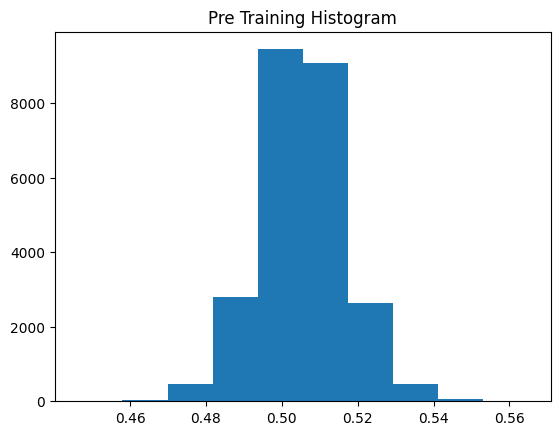

In [18]:
pre_prediction = pretraining_model.predict(x_test)
plt.hist(pre_prediction, bins=10)
plt.gca().set(title='Pre Training Histogram');

#### Post Training Results

782/782 [==============================] - 2s 3ms/step


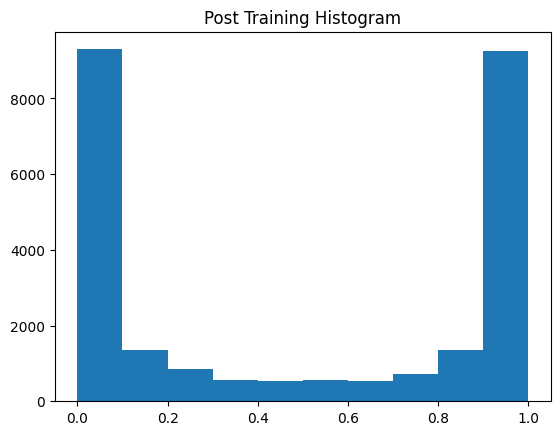

In [19]:
post_prediction = posttraining_model.predict(x_test)
plt.hist(post_prediction, bins=10)
plt.gca().set(title='Post Training Histogram');

The histogram did provide more insight. In the untrained model, the results are centered roughly around 0.5, in whihc values below 0.5 were rounded to 0 and values above, to 1. This loosely explains why the results had around a 50% accuracy. 

After the model was trained, it provided more concrete predictions as to whether it was a 1 or 0.

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

## 5) Find all the predictions where the model got the answer wrong.  Generate a histogram of the corresponding output probabilities.  Explain what this represents, and comment on whether or not it looks like you'd expect. (Use 10 bins)

[Text(0.5, 1.0, 'Pre Training Wrong Predictions')]

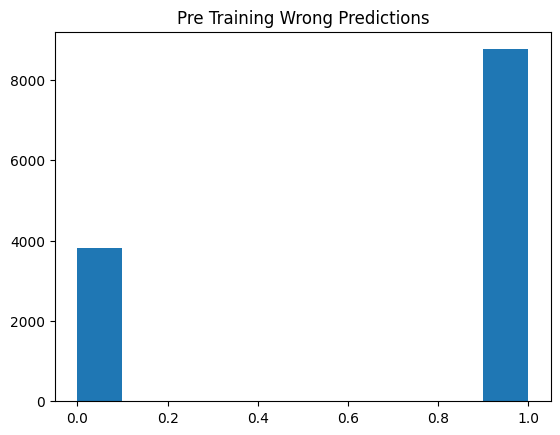

In [20]:
pre_prediction_falses = np.round(pre_prediction)[:, 0]
pre_prediction_falses = pre_prediction_falses[pre_prediction_falses != y_test]
num_untrained_falses = len(pre_prediction_falses)
plt.hist(pre_prediction_falses, bins=10)
plt.gca().set(title='Pre Training Wrong Predictions')

The pre training model predicted around 12500 results wrong - 12000 of them were predicted to be 1s but were acutally 0s and around 500 were 0s when they should have been 1s. This matches our expectations of a 50% accuracy as 12500 is 50% of the original dataset. Moreover we noticed the pre-training histogram was skewed to the right, which means that more values were predicted to be ones and correspondingly a larger number were false predictions.

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

3010


[Text(0.5, 1.0, 'Post Training Wrong Predictions')]

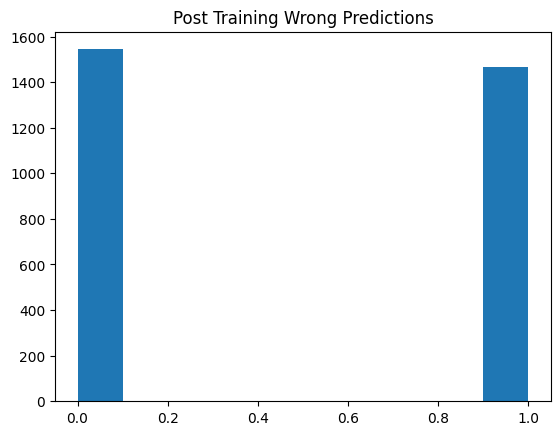

In [23]:
post_prediction_falses = np.round(post_prediction)[:, 0]
post_prediction_falses = post_prediction_falses[post_prediction_falses != y_test]
num_trained_falses = len(post_prediction_falses)
print(len(post_prediction_falses))
plt.hist(post_prediction_falses, bins=10)
plt.gca().set(title='Post Training Wrong Predictions')

The Trained Model predicted a total of 3010 values wrong (around 1550 were predicted to be 0s instead of 1s and around 1.5k were predicted to be 1s instead of 0s). 3010 wrong values results in an error rate of 12.04% which corresponds to a accuracy of 87.86% which matches with our results from the sections before. No unexpected behaviour was seen here.

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

## 6) Divide the answers from the second histogram by the answers from the first histogram.  Explain what this represents.

Dividing the number of errors by the total number of samples (second_hist/first_hist) gives us the error rate.

In [22]:
error_rate_untrained = num_untrained_falses/len(pre_prediction)
print("The untrained model's error rate was {}".format(error_rate_untrained))

error_rate_trained = num_trained_falses/len(post_prediction)
print("The trained model's error rate was {}".format(error_rate_trained))

The untrained model's error rate was 0.5034
The trained model's error rate was 0.1204


## 7) Try to improve the model performance.  The team with the highest score will receive 50 extra points on the assignment.

In [31]:
model = keras.Sequential([
    layers.Dropout(0.2),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="Adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=2000,
                    validation_data=(x_val, y_val))

Epoch 1/10
8/8 [==============================] - 8s 454ms/step - loss: 0.6831 - accuracy: 0.5941 - val_loss: 0.6478 - val_accuracy: 0.7404
Epoch 2/10
8/8 [==============================] - 3s 367ms/step - loss: 0.6055 - accuracy: 0.7486 - val_loss: 0.5460 - val_accuracy: 0.8227
Epoch 3/10
8/8 [==============================] - 3s 330ms/step - loss: 0.5049 - accuracy: 0.8067 - val_loss: 0.4502 - val_accuracy: 0.8553
Epoch 4/10
8/8 [==============================] - 3s 328ms/step - loss: 0.4150 - accuracy: 0.8509 - val_loss: 0.3820 - val_accuracy: 0.8699
Epoch 5/10
8/8 [==============================] - 3s 338ms/step - loss: 0.3491 - accuracy: 0.8743 - val_loss: 0.3349 - val_accuracy: 0.8786
Epoch 6/10
8/8 [==============================] - 3s 321ms/step - loss: 0.3021 - accuracy: 0.8924 - val_loss: 0.3057 - val_accuracy: 0.8846
Epoch 7/10
8/8 [==============================] - 3s 328ms/step - loss: 0.2653 - accuracy: 0.9037 - val_loss: 0.2900 - val_accuracy: 0.8899
Epoch 8/10
8/8 [====

The highest accuracy we achieved was 89.12 using this model. We used dropout layers which utilizes a mask to ignore the inputs from certain nodes during training. This thereby kind of reduces overfitting